# Regression using Artificial Neural Network (ANN):

### Importing the Libraries:

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Importing the Data:

In [2]:
df = pd.read_csv('autompg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


If you look at the data you can see that the first field **mpg** is 'Miles per gallon' or 'Mileage of the car'. So the problem is that given different characteristics of the car you need to determine what is the mileage of the car?
<br>
**mpg** is a numerical field so it is a regression problem. Let's visualize this,

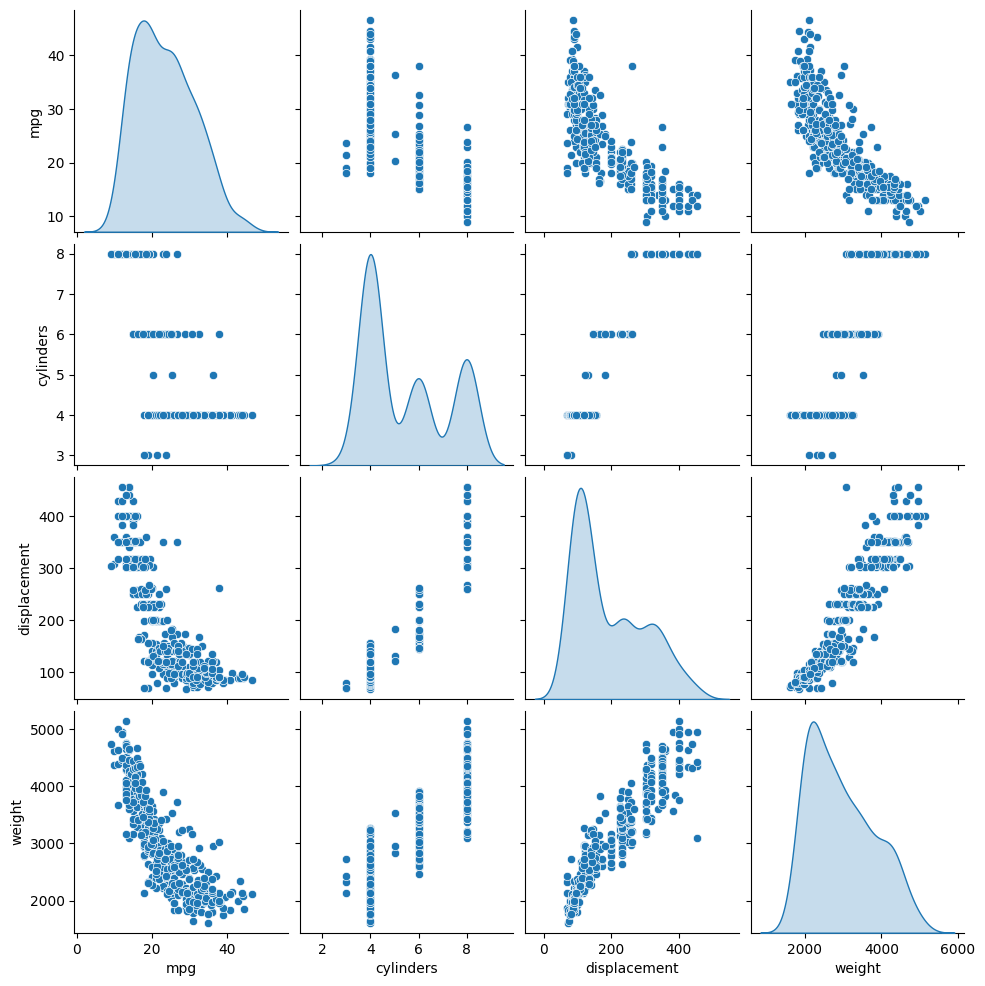

In [3]:
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind='kde')

In [4]:
X = df.iloc[:,1:8]
y = df.iloc[:,0]

In [18]:
# handle missing values by filling with the mean
X = X.fillna(X.mean())

# scaling the data
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

### Splitting the Data:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12)

### Layers:

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=7, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1)) # linear activation

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


You know why it is called the Sequential model because you have the input layer then you are adding the hidden layer we have the you know 64 neurons then I have another layer which have 64 neurons and then finally the output layer.

In [22]:
# compiling the model
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

In compiling the model, we used 'mean squared error' as loss function, so optimizer we have used 'rmsprop' instead of SGD and metrics as 'mae'.

In [23]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 592.9025 - mae: 23.0671  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 555.4108 - mae: 22.1842  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 510.8530 - mae: 21.0782 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 450.7931 - mae: 19.5578 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 382.8105 - mae: 18.0066 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308.0411 - mae: 15.6429 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 269.4555 - mae: 14.6970 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188.0861 - mae: 12.1215 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129.7176 - mae: 9.9851  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.9570 - mae: 7.5593 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.2059 - mae: 6.0429 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.9626 - mae: 4

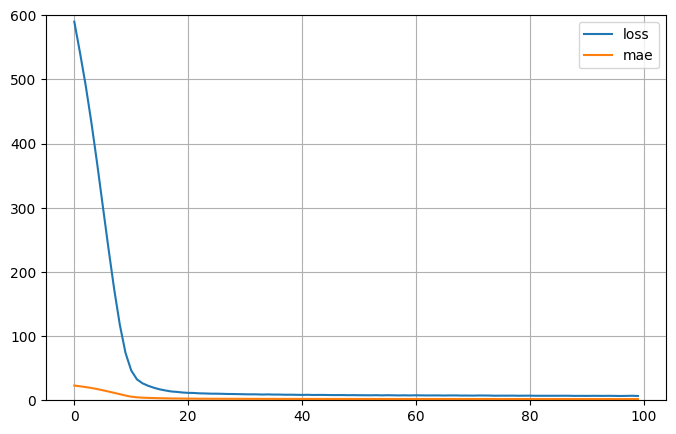

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,600) # set the vertical range
plt.show()

As expected, the **'Loss'** and **'mae'** actually goes down as we move from epoch to epoch.

### Evaluation:

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,476 (37.02 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,739 (18.52 KB)

In [26]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5924 - mae: 1.8459  


[7.293828010559082, 1.8482577800750732]

In [27]:
y_pred =  model.predict(X_test)
list_of_tuples = list(zip(y_test, y_pred[:,0]))

# converting list of tuples into pandas DataFrame
df = pd.DataFrame(list_of_tuples, columns = ['Actual', 'Predicted'])
df

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


,Actual,Predicted
0,36.0,32.110172
1,25.0,24.953642
2,20.2,22.629871
3,15.0,14.570011
4,17.0,17.747383
...,...,...
75,24.0,23.003576
76,34.2,32.935513
77,21.0,18.612337
78,19.0,28.185972


**Let's look at a scatter plot and see how our predictions are,**

### Plot the Data:

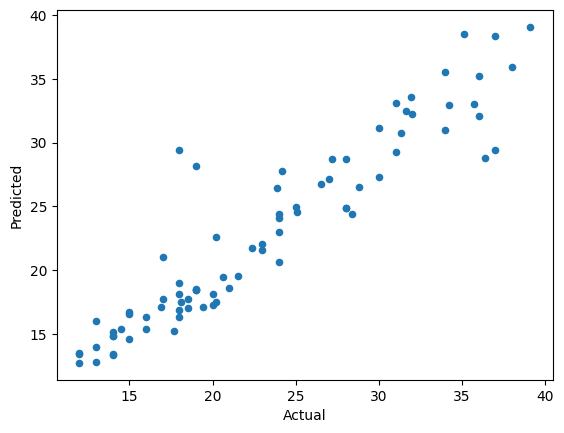

In [28]:
df.plot.scatter(x='Actual', y='Predicted')
plt.show()

There are some outlying observations where the prediction is small but actually it has a high value but overall this graph still regression model doing quite well.